#All neededed librarys

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.nddata import Cutout2D
from astropy import units
from astropy.io import fits
from astropy.modeling.models import Gaussian2D
import glob
from astropy.visualization import astropy_mpl_style
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from clustar.core import ClustarData
from astropy.visualization import ZScaleInterval
from astropy.io import fits
import random
from scipy.ndimage import rotate


In [2]:
#Define global variables

In [3]:
im_size = 100
shift_interval = 1

gaussians = []


Define Size of image in pixels and object in image
The object is a standard object from astropy, the idea is to use one of our own gaussian.

Here we plot the actual image

Lets say we want to crop the image to a standard size 

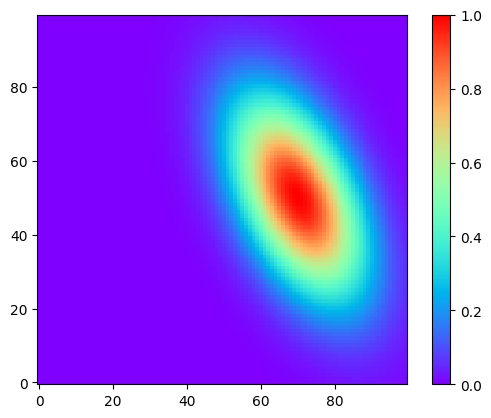

In [4]:
y, x = np.mgrid[0:500, 0:500]
data1 = Gaussian2D(1, 250, 250, 20, 10, theta=2)(x, y)
# plt.imshow(data1, origin='lower', cmap='rainbow')
# plt.colorbar()
# plt.show()

crop_center = (230, 250)
crop_size = units.Quantity((100, 100), units.pixel)
crop = Cutout2D(data1, crop_center, crop_size)

plt.imshow(crop.data, origin='lower', cmap='rainbow')
plt.colorbar()
plt.show()

# zscale = ZScaleInterval(contrast=0.2, nsamples=1)
# plt.imshow(zscale(crop.data),
#            origin='lower', cmap='rainbow')
# plt.show()

Load a FITS file instead of simulating

In [5]:
#Get all the fits files adresses un a dictionary
filenames = glob.glob('data/test_pos/*.fits')
data_set = {}

In [6]:
def fits2png(file_path):
    data = fits.getdata(file_path)
    zscale = ZScaleInterval()
    data = zscale(data).squeeze()
    return data

In [7]:
def printFig(data, title):
    plt.figure()
    plt.imshow(data, origin='lower', cmap='rainbow')
    plt.title(title)
    plt.colorbar()
    plt.show()

# Find object of interest in FITS-file and return pos 

In [8]:
def find_object_pos(file):
    cd = ClustarData(path=file, group_factor=.25)
    if len(cd.groups) > 0:
        disk = cd.groups[0]
        bounds = disk.image.bounds
        x = (bounds[2] + bounds[3])/2 
        y = (bounds[0] + bounds[1])/2
        return (x, y)
    
    else:
        print("No object found in {}".format(file))
        return None


# Go through all the FITS adresses and print the graphs

In [9]:

for file in filenames:
    img_data = fits.getdata(file)
    object_pos = find_object_pos(file)
    if object_pos != None:
        # Data shape is (1, 1, x, y) we want it to be (x, y)
        img_data.shape = (img_data.shape[2], img_data.shape[3])
        # Set the size of the crop in pixels
        crop_size = units.Quantity((im_size, im_size), units.pixel)
        img_crop = Cutout2D(img_data, object_pos, crop_size)
        gaussians.append(img_crop)


c:\ChalmersWorkspaces\KandidatArbete\almaEnv\lib\site-packages\clustar\group.py:340: RuntimeWarning: invalid value encountered in sqrt
  stats_.y_len = 2 * np.sqrt(stats_.eigen_values[1] *


No object found in data/test_pos\hh212_2015_band7_0.fits
No object found in data/test_pos\hh212_2015_band7_1.fits


In [10]:
# This function flips the image horizontally, vertically or both
def flip_disk(disk_to_flip):

    flipped_disk = disk_to_flip

    if bool(random.getrandbits(1)):
        flipped_disk = np.fliplr(flipped_disk)

    if bool(random.getrandbits(1)):
        flipped_disk = np.flipud(flipped_disk)

    if bool(random.getrandbits(1)):
        flipped_disk = np.flip(flipped_disk)

    return flipped_disk


In [11]:
# This function rotates the image by a random angle
def rotate_disk(disk_to_rotate, angle):

    # Rotate the disk
    rotated_disk = rotate(disk_to_rotate, angle)
    # Since rotating pads the image, we need to crop it to the original size
    x, y = (len(rotated_disk[0]), len(rotated_disk))

    shift_interval = 0
    si = shift_interval + 1

    rand_x_shift = random.randint(-shift_interval, shift_interval)
    rand_y_shift = random.randint(-shift_interval, shift_interval)

    (x_lower, x_upper) = int((x/2 - im_size/2)) + \
        rand_x_shift, int(x/2 + im_size/2) + rand_x_shift
    (y_lower, y_upper) = int((y/2 - im_size/2)) + \
        rand_y_shift, int(y/2 + im_size/2) + rand_y_shift

    return rotated_disk[(y_lower+si):(y_upper-si), (x_lower+si):(x_upper-si)]


In [12]:
def augment(disk):
    angle = random.randint(0, 360) 
    return rotate_disk(flip_disk(disk), angle)

print(len(filenames))

8


## Save FITS to PNG

data/test_pos\b335_2017_band6_0.fits
(500.0, 500.0)
data/test_pos\b335_2018_band7_0.fits
(500.0, 500.0)
data/test_pos\hh212_2015_band7_0.fits
(512.0, 512.0)
data/test_pos\hh212_2015_band7_1.fits
(512.0, 512.0)
data/test_pos\hh212_2016_band7_0.fits
(640.0, 640.0)
data/test_pos\hh212_2016_band7_1.fits
(640.0, 640.0)
data/test_pos\serpenssouthc7_2019_band6_0.fits
(240.0, 240.0)
data/test_pos\serpenssouthc7_2019_band7_0.fits
(720.0, 720.0)


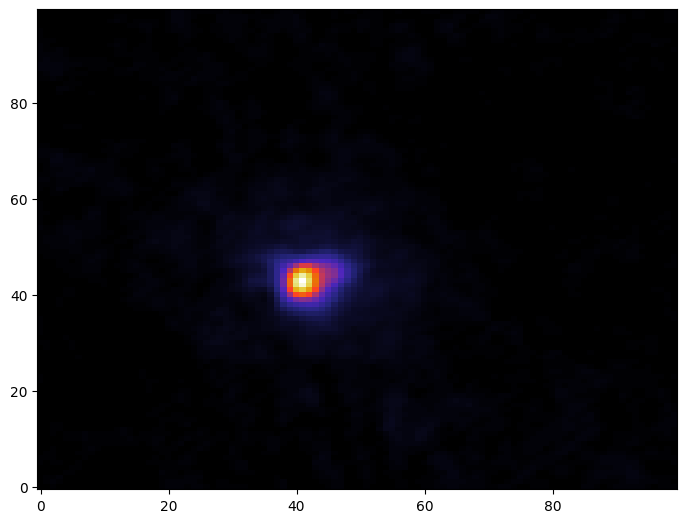

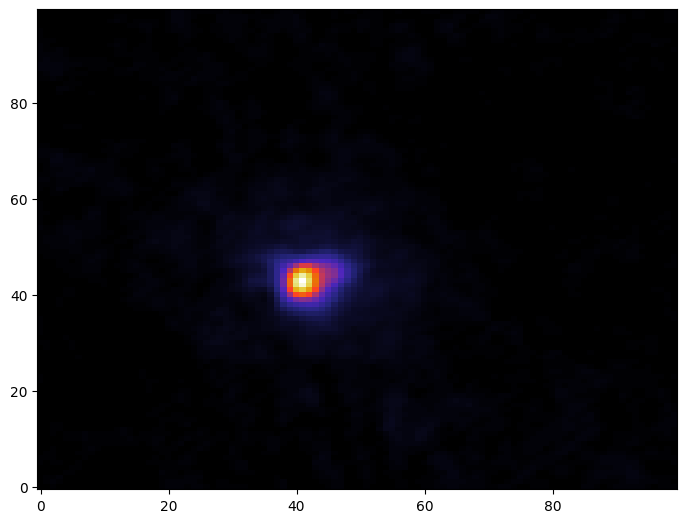

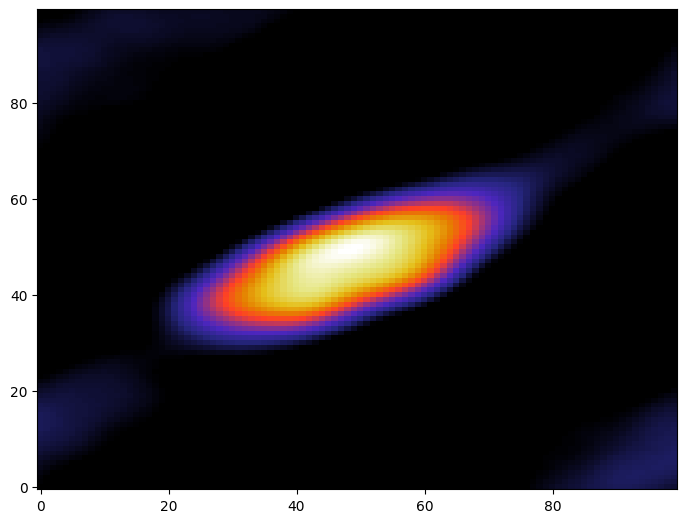

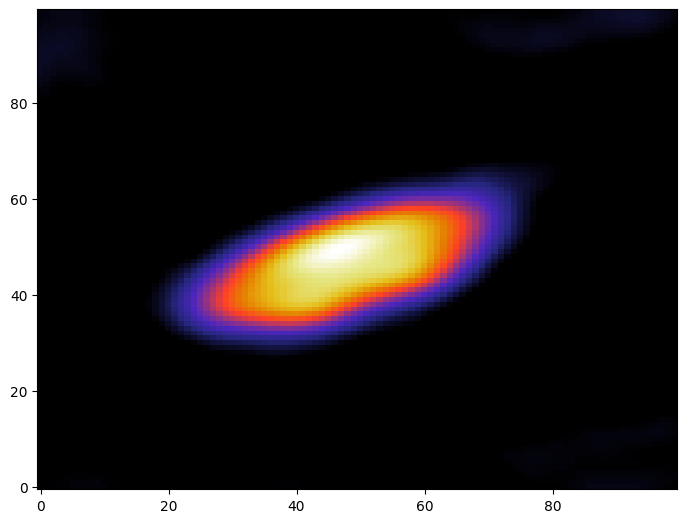

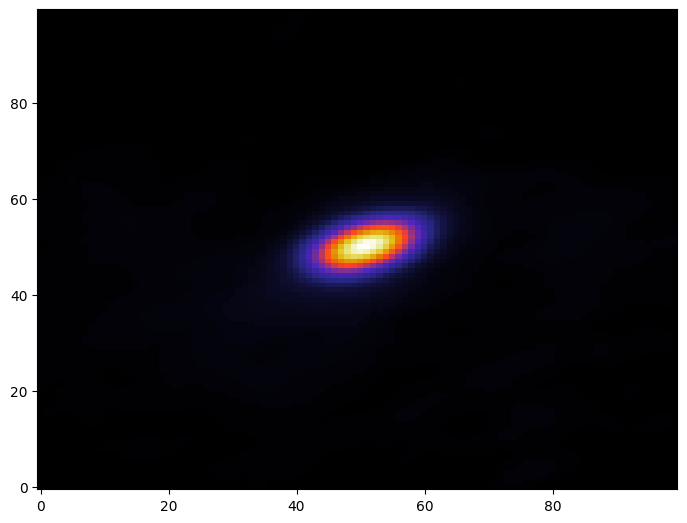

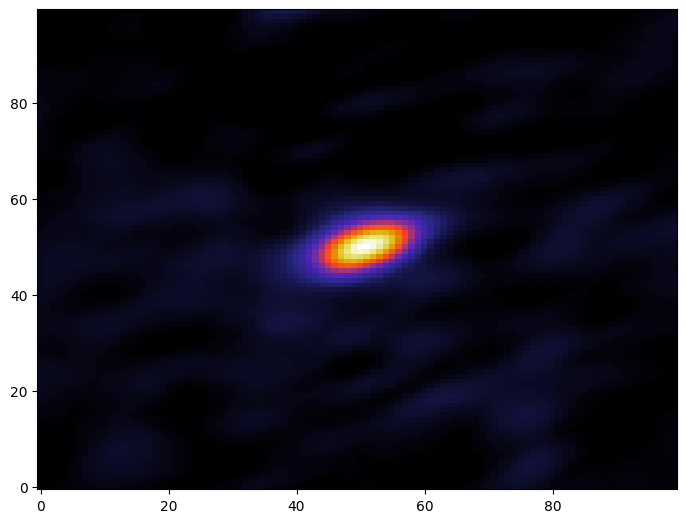

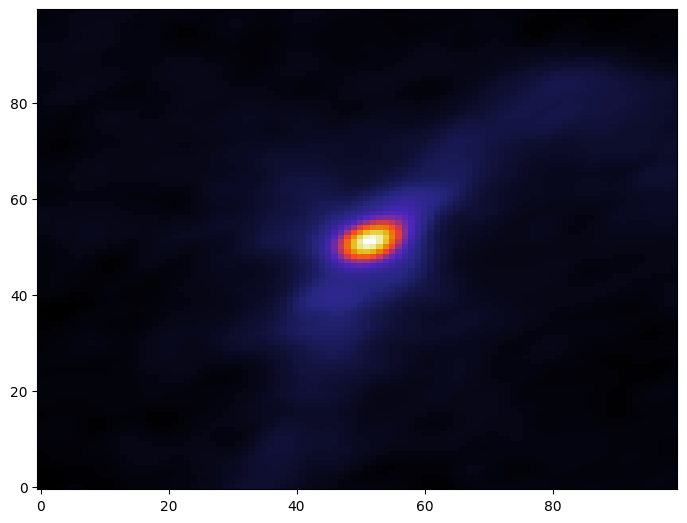

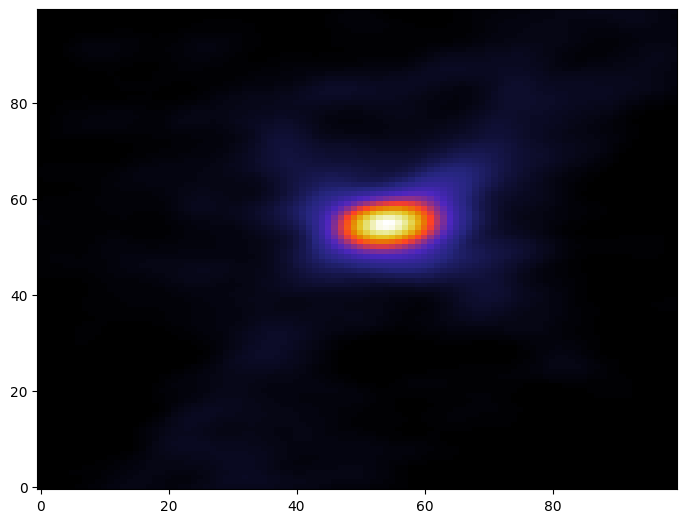

In [14]:
zscale = ZScaleInterval(contrast=0.25, nsamples=1)

for file in filenames:
    print(str(file))
    img_data = fits.getdata(file)
    object_pos = img_data.shape[2]/2, img_data.shape[3]/2
    img_data.shape = (img_data.shape[2], img_data.shape[3])
    print(object_pos)

    crop_size = units.Quantity((im_size, im_size), units.pixel)
    img_crop = Cutout2D(img_data, object_pos, crop_size)

    fig = plt.figure(frameon=False)
    ax = plt.Axes(fig, [0., 0., 1., 1.])

    fig.add_axes(ax)
    ax.imshow(zscale((img_crop.data)),
              origin='lower', cmap='CMRmap_r', aspect='auto')
    fig.savefig('data/pos_dataset/{}.png'.format(file[14:-5]))
    
# CMRmap  CMRmap_r  Spectral
    



152
152
152
152
152
152
152
152


NotImplementedError: memoryview: unsupported format >f

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

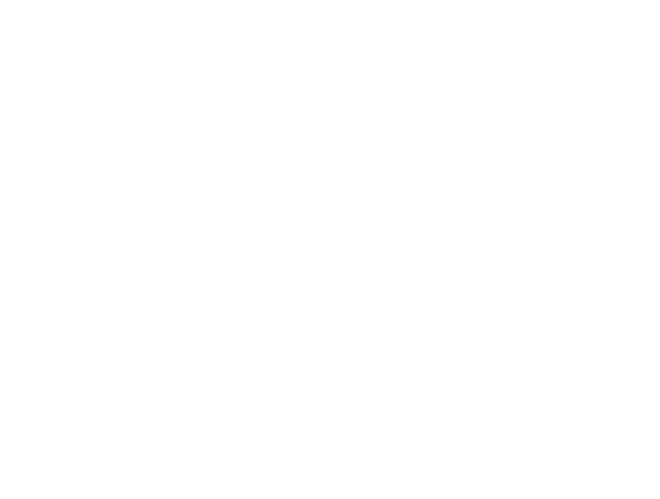

In [27]:
# #Save the images


for file in filenames:
    img_data = fits.getdata(file)
    object_pos = img_data.__sizeof__()
    print(object_pos)
    # if object_pos != None:
    #     # Data shape is (1, 1, x, y) we want it to be (x, y)
    #     img_data.shape = (img_data.shape[2], img_data.shape[3])
    #     # Set the size of the crop in pixels
    #     crop_size = units.Quantity((im_size, im_size), units.pixel)
    #     img_crop = Cutout2D(img_data, object_pos, crop_size)
    #     gaussians.append(img_crop)




count = 0
for file in filenames:
    img_data = fits.getdata(file)

    zscale = ZScaleInterval(contrast=0.25, nsamples=1)

    plt.figure()
    plt.figure(figsize=(im_size, im_size), dpi=100)
    fig = plt.figure(frameon=False)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    
    x, y = (len(img_data.data[0]), len(img_data.data))

    (x_lower, x_upper) = int((x/2 - im_size/2)), int(x/2 + im_size/2)
    (y_lower, y_upper) = int((y/2 - im_size/2)), int(y/2 + im_size/2)
    
    ax.imshow(zscale((img_data.data[(x_lower):(x_upper), (y_lower):(y_upper)])),
              origin='lower', cmap='rainbow', aspect='auto')
    # open('data/pos_dataset/pos_{}.png'.format(gaussian), 'w').close()
    fig.savefig('data/pos_dataset/pos_{}.png'.format(count))
    print(str(filenames[count]))
    count += 1



[<astropy.nddata.utils.Cutout2D object at 0x000001BF5E378C70>, <astropy.nddata.utils.Cutout2D object at 0x000001BF5E452AF0>, <astropy.nddata.utils.Cutout2D object at 0x000001BF5E6B87C0>, <astropy.nddata.utils.Cutout2D object at 0x000001BF3AFECF70>, <astropy.nddata.utils.Cutout2D object at 0x000001BF3AC03370>, <astropy.nddata.utils.Cutout2D object at 0x000001BF3ABDBFD0>]
Appending to positive dataset
Appending to positive dataset
Appending to positive dataset


Appending to positive dataset
Appending to positive dataset
Appending to positive dataset


array([], dtype=float64)

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

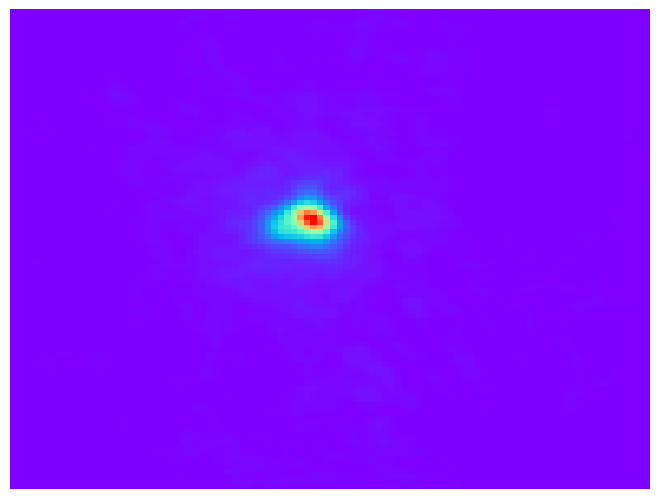

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

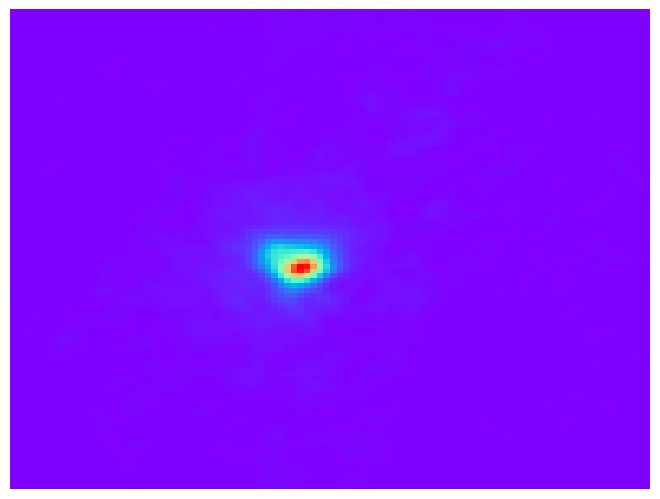

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

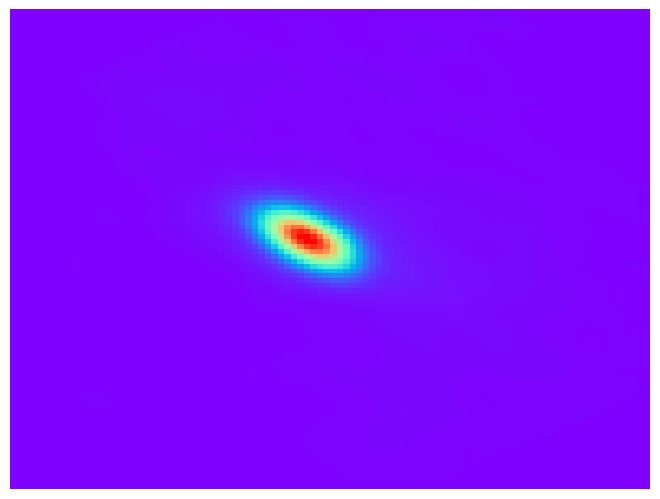

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

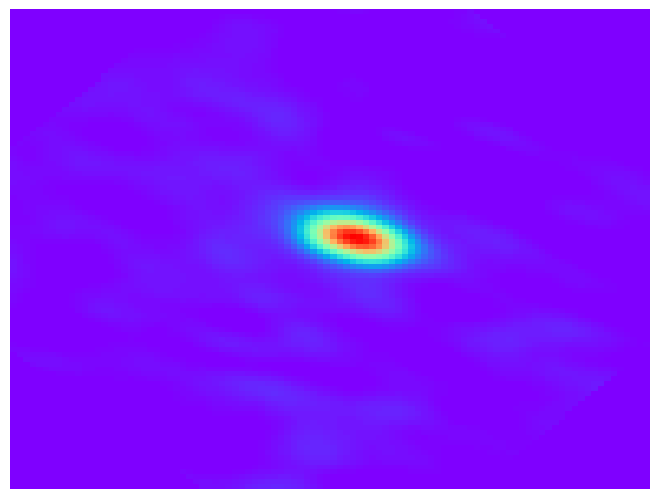

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

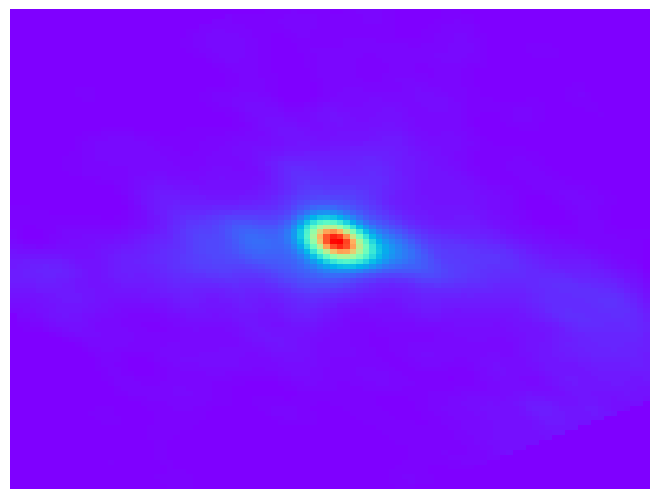

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

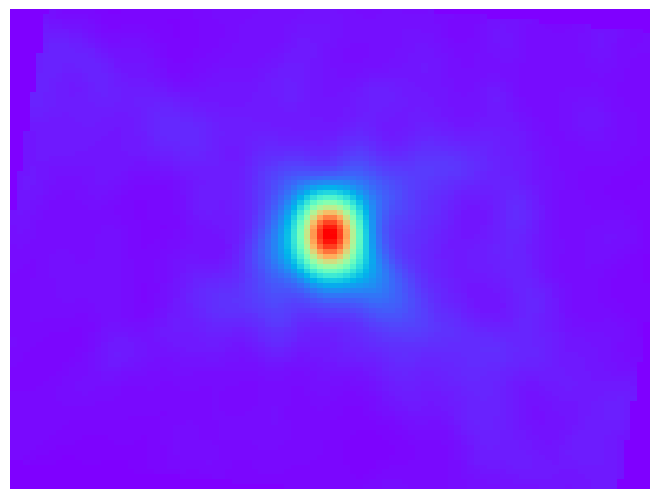

In [15]:
# This function generates the positive dataset
def generate_pos_dataset(augmentations_per_gaussian):
    count = 0
    pos_dataset = np.array([])
    for gaussian in gaussians:
        for i in range(0, augmentations_per_gaussian):
            zscale = ZScaleInterval(contrast=0.25, nsamples=1)
            # Augment the data and add it to the dataset as png
            # plt.imshow(zscale(augment(gaussian.data)),
                        # origin='lower', cmap='rainbow')
            # plt.colorbar()
            # plt.title("Augmented gaussian")
            # plt.show()


            plt.figure()
            plt.figure(figsize=(im_size, im_size), dpi=100)
            
            fig = plt.figure(frameon=False)
            ax = plt.Axes(fig, [0., 0., 1., 1.])
            ax.set_axis_off()
            fig.add_axes(ax)
            ax.imshow(zscale(augment(gaussian.data)),
                      origin='lower', cmap='rainbow', aspect='auto')
            open('data/pos_dataset/pos_{}.png'.format(count), 'w').close()
            fig.savefig('data/pos_dataset/pos_{}.png'.format(count))
            count += 1

            # pos_dataset.append(zscale(augment(gaussian.data)))
            # np.append(pos_dataset, zscale(augment(gaussian.data)))
            print("Appending to positive dataset")
    return pos_dataset
print(gaussians)
generate_pos_dataset(1)

In [16]:
def generate_neg_dataset(augmentations_per_gaussian):
    neg_dataset = np.array([])
    im_center = im_size/2
    y, x = np.mgrid[0:im_size, 0:im_size]
    count = 0
    for i in range(0, len(filenames)):
        for j in range(0, augmentations_per_gaussian):
            rand_x_shift = random.randint(-shift_interval, shift_interval)
            rand_y_shift = random.randint(-shift_interval, shift_interval)
            data = Gaussian2D(1, im_center + rand_x_shift,
                              im_center +
                              rand_y_shift, random.randrange(1, 6),
                              random.randrange(1, 6), theta=random.randrange(0, 2))(x, y)
            
            plt.figure()
            plt.figure(figsize=(im_size, im_size), dpi=100)

            fig = plt.figure(frameon=False)
            ax = plt.Axes(fig, [0., 0., 1., 1.])
            ax.set_axis_off()
            fig.add_axes(ax)
            ax.imshow(zscale(augment(data)),
                      origin='lower', cmap='rainbow', aspect='auto')
            open('data/neg_dataset/neg_{}.png'.format(count), 'w').close()
            fig.savefig('data/neg_dataset/neg_{}.png'.format(count))
            count += 1
            
            # zscale = ZScaleInterval(contrast=0.25, nsamples=1)
            # np.append(neg_dataset, zscale(augment(data)))
            # neg_dataset.append(zscale(augment(data)))
            print("Appended negative gaussian")
    return neg_dataset

# generate_neg_dataset(50)


# Augment and print the graphs

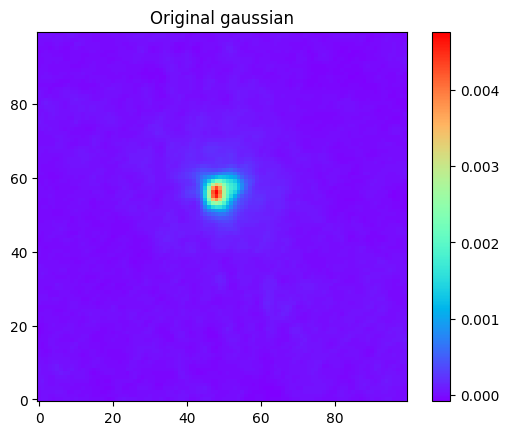

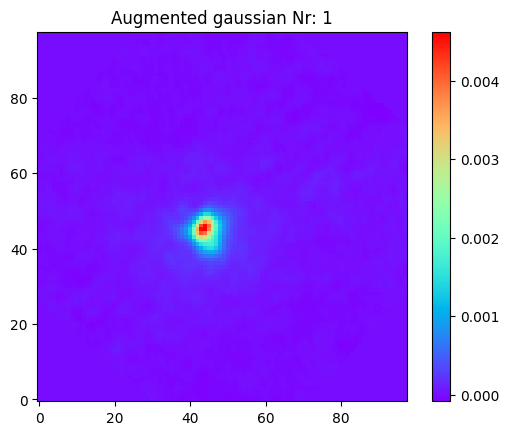

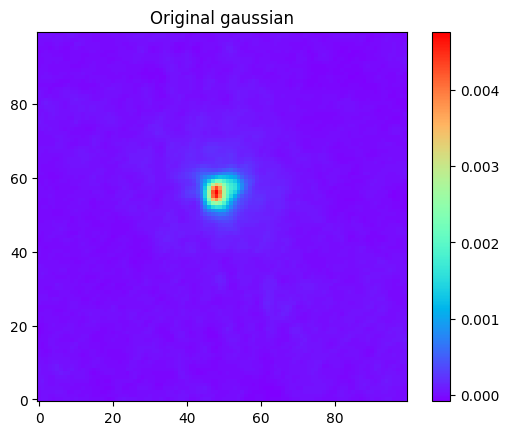

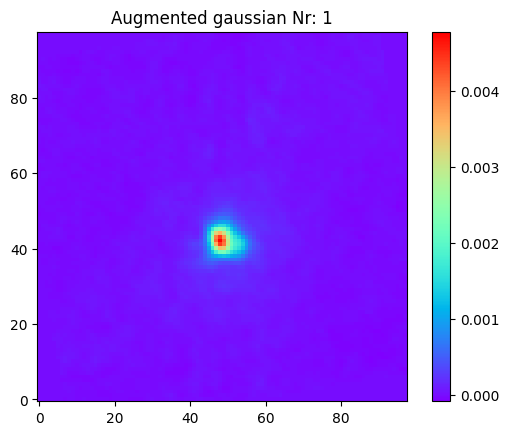

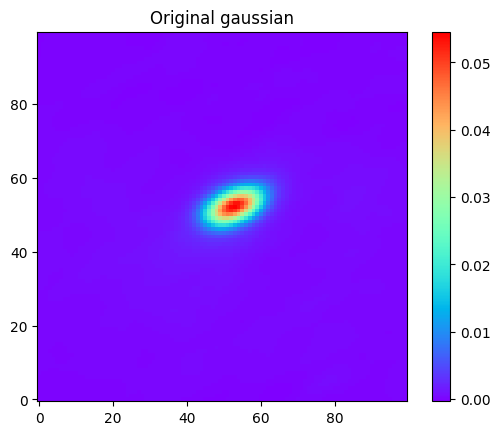

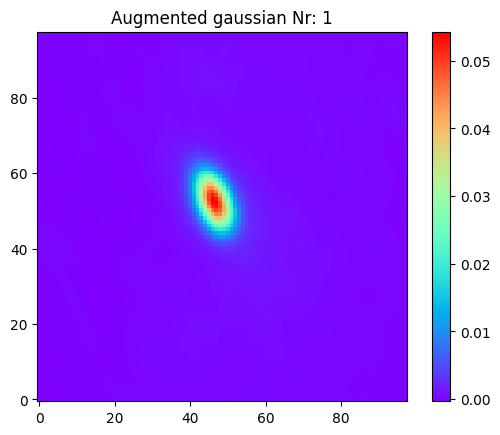

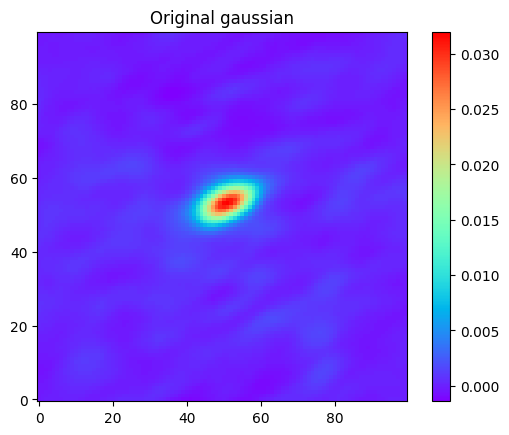

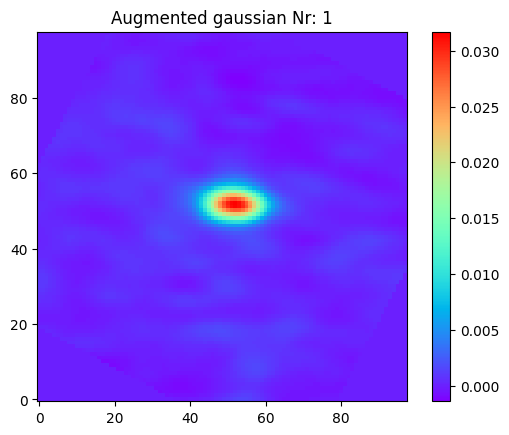

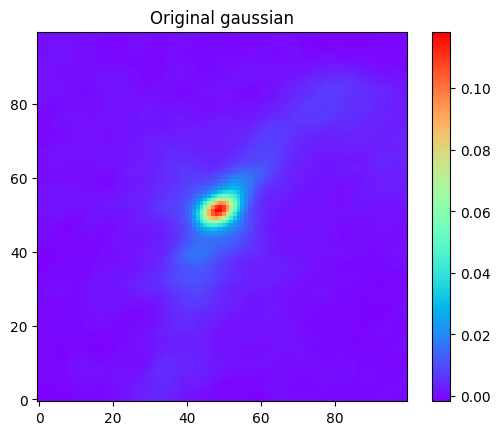

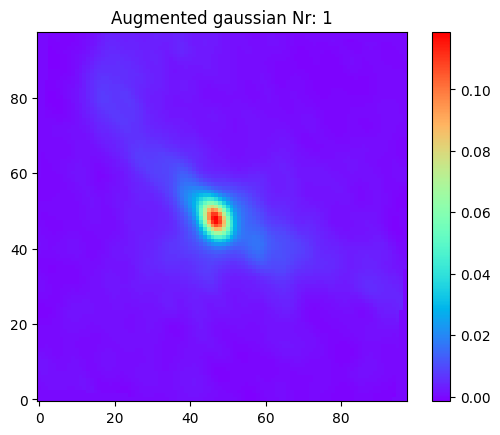

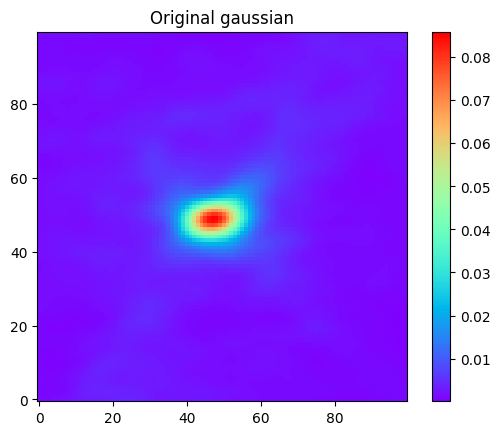

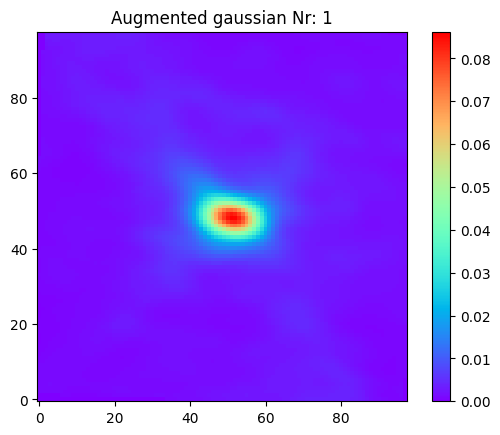

In [17]:
augmentations_per_gaussian = 1
for gaussian in gaussians:
    printFig(gaussian.data, "Original gaussian")
    
    for i in range(0, augmentations_per_gaussian):
        printFig(augment(gaussian.data), "Augmented gaussian Nr: {}".format(i+1))

# CNN

In [18]:
# importing the required libraries

import matplotlib.pyplot as plt
import numpy as np
import os
import pprint
pp = pprint.PrettyPrinter(indent=4)

import joblib
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split


In [19]:
def resize_all(src, pklname, include, width=640, height=480):
    """
    load images from path, resize them and write them as arrays to a dictionary, 
    together with labels and metadata. The dictionary is written to a pickle file 
    named '{pklname}_{width}x{height}px.pkl'.
     
    Parameter
    ---------
    src: str
        path to data
    pklname: str
        path to output file
    width: int
        target width of the image in pixels
    include: set[str]
        set containing str
    """

    height = height if height is not None else width

    data = dict()
    data['description'] = 'resized ({0}x{1})disks in rgb'.format(
        int(width), int(height))
    data['label'] = []
    data['filename'] = []
    data['data'] = []

    pklname = f"{pklname}_{width}x{height}px.pkl"

    # read all images in PATH, resize and write to DESTINATION_PATH
    for subdir in os.listdir(src):
        if subdir in include:
            print(subdir)
            current_path = os.path.join(src, subdir)

            for file in os.listdir(current_path):
                if file[-3:] in {'jpg', 'png'}:
                    im = imread(os.path.join(current_path, file))
                    im = resize(im, (width, height))  # [:,:,::-1]
                    data['label'].append(subdir[:-4])
                    data['filename'].append(file)
                    data['data'].append(im)

        joblib.dump(data, pklname)
